In [1]:
import pandas as pd
import math

In [2]:
#분석 데이터 불러오기
#분석은 의령군 / 산청군 생활인구, 접근성, 문화공간 현황 분석

per23 = pd.read_csv('23년도 경남 생활인구 데이터.csv', encoding='utf-8')

move23 = pd.read_csv('23년도 경남 접근성 데이터 셋.csv', sep= '\t',encoding='cp949')

In [3]:
per23 = per23[per23['시군구명'].isin(['의령군','산청군'])]
move23 = move23[move23['시군구명'].isin(['의령군','산청군'])]

In [4]:
men_cnt23 = [int(col.replace(',','')) for col in per23['남']]
w_cnt23 = [int(col.replace(',','')) for col in per23['여']]
per23['남'] = men_cnt23
per23['여'] = w_cnt23

In [5]:
per23

,시군구명,접근성 변수명,남,여
28,의령군,세대인구_외국인,625,259
29,의령군,세대인구_성별,12668,12807
30,의령군,거주인구_총인구,13293,13066
31,의령군,연령별_100세 이상인구,5,12
32,의령군,연령별_10대미만 인구,459,13034
33,의령군,연령별_10대인구,719,629
34,의령군,연령별_20대인구,881,580
35,의령군,연령별_30대인구,787,713
36,의령군,연령별_40대인구,1365,1056
37,의령군,연령별_50대인구,2405,1884


In [6]:
#의령 / 산청 데이터나누기

의령인구23 = per23[per23['시군구명']=='의령군']
의령인구23

산청인구23 = per23[per23['시군구명']=='산청군']
산청인구23

의령인구23

,시군구명,접근성 변수명,남,여
28,의령군,세대인구_외국인,625,259
29,의령군,세대인구_성별,12668,12807
30,의령군,거주인구_총인구,13293,13066
31,의령군,연령별_100세 이상인구,5,12
32,의령군,연령별_10대미만 인구,459,13034
33,의령군,연령별_10대인구,719,629
34,의령군,연령별_20대인구,881,580
35,의령군,연령별_30대인구,787,713
36,의령군,연령별_40대인구,1365,1056
37,의령군,연령별_50대인구,2405,1884


In [7]:
의령거주인구23 = 의령인구23.iloc[0:3]

의령거주인구23['합계'] = 의령거주인구23[['남','여']].sum(axis = 1)
의령거주인구23

C:\Users\user\AppData\Local\Temp\ipykernel_3704\3986089398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령거주인구23['합계'] = 의령거주인구23[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
28,의령군,세대인구_외국인,625,259,884
29,의령군,세대인구_성별,12668,12807,25475
30,의령군,거주인구_총인구,13293,13066,26359


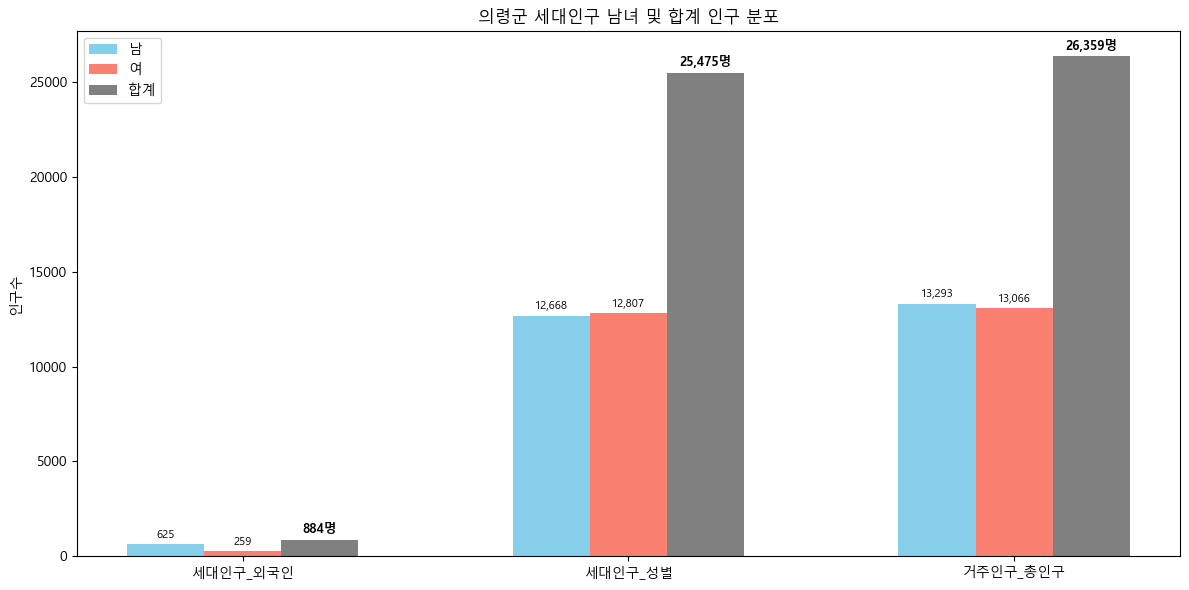

In [8]:
#의령군 23년도 거주인구 분석

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 의령거주인구23['접근성 변수명']
men = 의령거주인구23['남']
women = 의령거주인구23['여']
total = 의령거주인구23['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("의령군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


In [17]:
의령연령별23 = 의령인구23[
    (의령인구23["접근성 변수명"].str.contains("연령별")) &
    (~의령인구23["접근성 변수명"].str.contains("총인구|성별"))
]


의령연령별23["연령순서"] = (
    의령연령별23["접근성 변수명"]
    .str.extract(r'(\d+)', expand=False) 
    .fillna("1000") 
    .astype(int)
)

# 연령순서 기준으로 정렬
의령연령별23 = 의령연령별23.sort_values("연령순서").drop(columns="연령순서")


의령연령별23['합계'] = 의령연령별23[['남','여']].sum(axis = 1)
의령연령별23

C:\Users\user\AppData\Local\Temp\ipykernel_3704\814830768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령연령별23["연령순서"] = (


,시군구명,접근성 변수명,남,여,합계
32,의령군,연령별_10대미만 인구,459,13034,13493
33,의령군,연령별_10대인구,719,629,1348
34,의령군,연령별_20대인구,881,580,1461
35,의령군,연령별_30대인구,787,713,1500
36,의령군,연령별_40대인구,1365,1056,2421
37,의령군,연령별_50대인구,2405,1884,4289
38,의령군,연령별_60대인구,3294,2803,6097
39,의령군,연령별_70대인구,1750,2065,3815
40,의령군,연령별_80대인구,897,2228,3125
41,의령군,연령별_90대인구,106,458,564


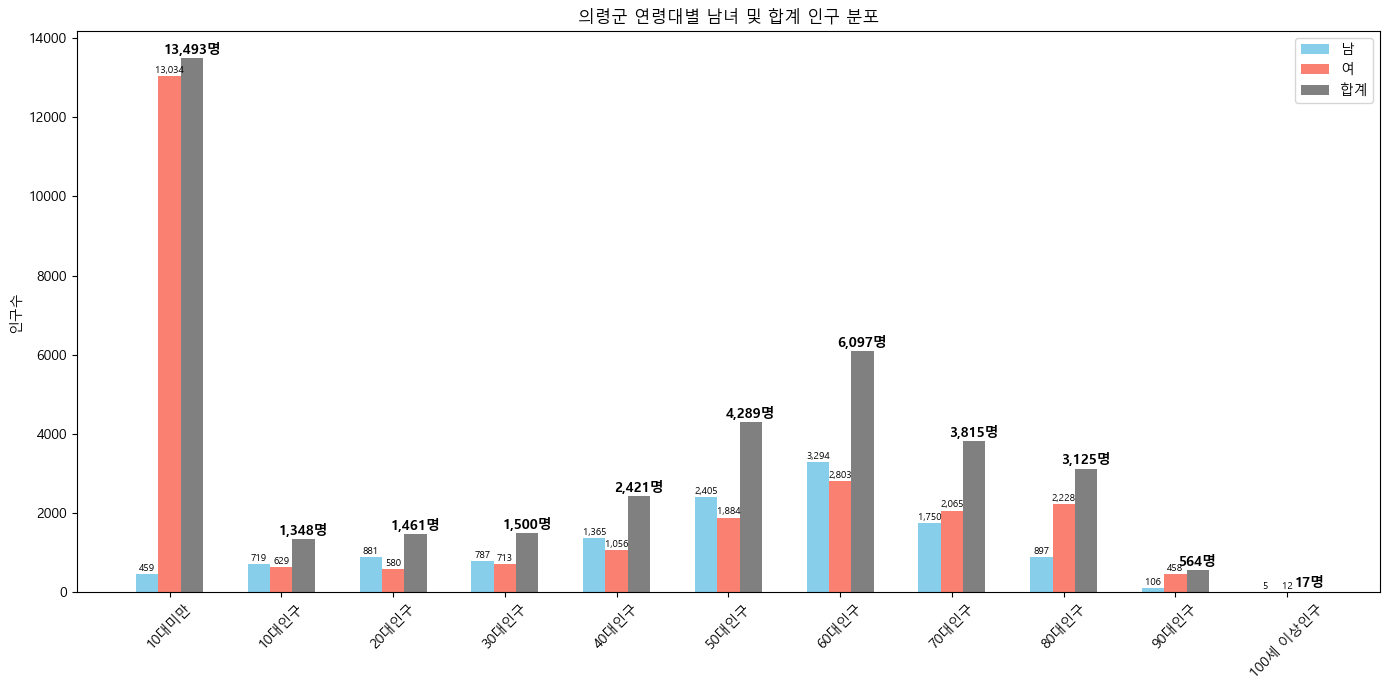

의령군 총인구 수 : 38,130명


In [18]:
#의령군 22년도 생활인구 분석
#의령군 연령대별 인구

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 의령연령별23["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 의령연령별23["남"]
women = 의령연령별23["여"]
total = 의령연령별23["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("의령군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


print(f'의령군 총인구 수 : {의령연령별23['합계'].sum():,}명')

In [19]:
산청거주인구23 = 산청인구23.iloc[0:3]

산청거주인구23['합계'] = 산청거주인구23[['남','여']].sum(axis = 1)
산청거주인구23

C:\Users\user\AppData\Local\Temp\ipykernel_3704\468194967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청거주인구23['합계'] = 산청거주인구23[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
42,산청군,세대인구_외국인,385,484,869
43,산청군,세대인구_성별,16758,16994,33752
44,산청군,거주인구_총인구,17143,17478,34621


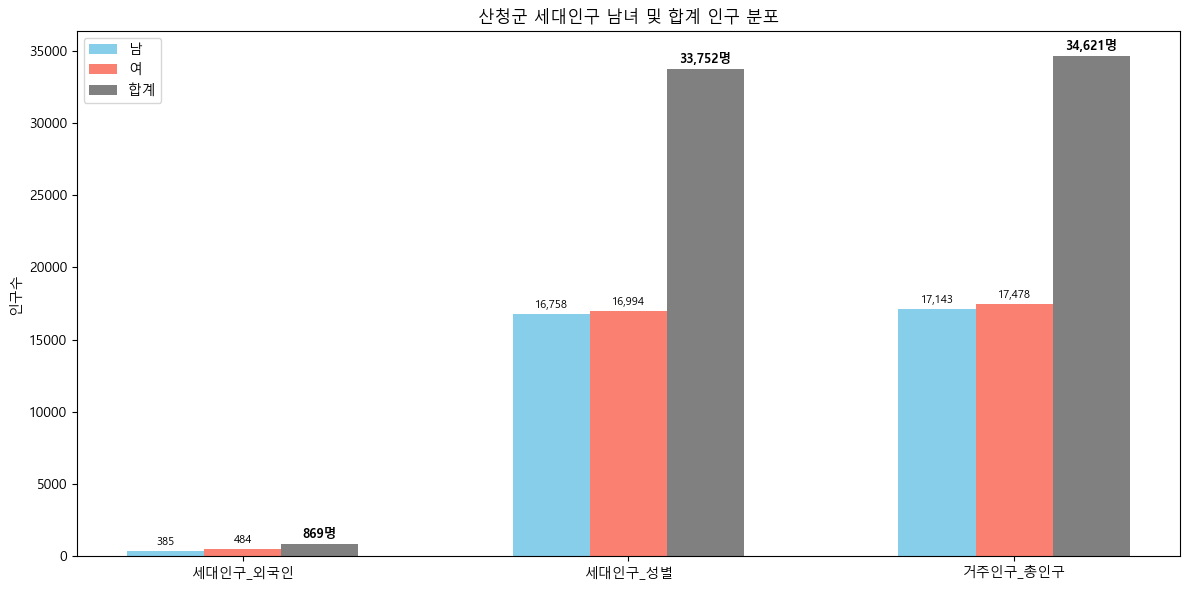

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 산청거주인구23['접근성 변수명']
men = 산청거주인구23['남']
women = 산청거주인구23['여']
total = 산청거주인구23['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("산청군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
산청연령별23 = 산청인구23[
    (산청인구23["접근성 변수명"].str.contains("연령별")) &
    (~산청인구23["접근성 변수명"].str.contains("총인구|성별"))
]

산청연령별23["연령순서"] = (
    산청연령별23["접근성 변수명"]
    .str.extract(r'(\d+)', expand=False) 
    .fillna("1000") 
    .astype(int)
)

# 연령순서 기준으로 정렬
산청연령별23 = 산청연령별23.sort_values("연령순서").drop(columns="연령순서")

산청연령별23['합계'] = 산청연령별23[['남','여']].sum(axis = 1)
산청연령별23

C:\Users\user\AppData\Local\Temp\ipykernel_3704\3550838727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청연령별23["연령순서"] = (


,시군구명,접근성 변수명,남,여,합계
46,산청군,연령별_10대미만 인구,965,467,1432
47,산청군,연령별_10대인구,1031,864,1895
48,산청군,연령별_20대인구,1151,829,1980
49,산청군,연령별_30대인구,966,783,1749
50,산청군,연령별_40대인구,1597,1355,2952
51,산청군,연령별_50대인구,3339,2740,6079
52,산청군,연령별_60대인구,4330,3904,8234
53,산청군,연령별_70대인구,2520,2740,5260
54,산청군,연령별_80대인구,1216,2734,3950
55,산청군,연령별_90대인구,108,563,671


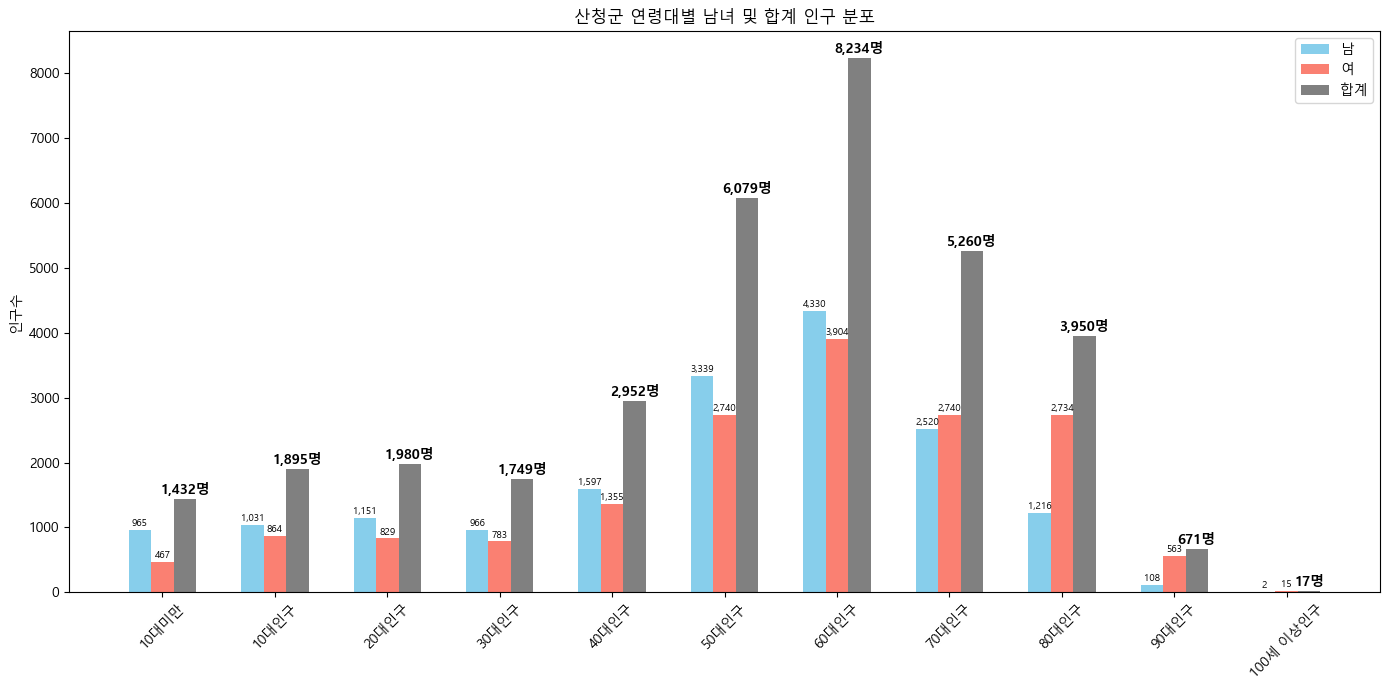

산청군 총인구 수 : 34,219명


In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 산청연령별23["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 산청연령별23["남"]
women = 산청연령별23["여"]
total = 산청연령별23["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("산청군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

print(f'산청군 총인구 수 : {산청연령별23['합계'].sum():,}명')

In [23]:
#접근성 현황분석

move23

,시군구명,접근성 변수명,위도,경도
6484,산청군,버스정류장_외부마을,35.416752,127.897085
6485,산청군,버스정류장_향양마을,35.410898,127.832699
6486,산청군,버스정류장_모례,35.463494,127.969346
6487,산청군,버스정류장_구평,35.641400,127.859451
6488,산청군,버스정류장_생초시외버스정류소,35.492044,127.832781
...,...,...,...,...
6908,의령군,주차장_백산마을 주차장,35.431821,128.377777
6909,의령군,주차장_사현마을 주차장,35.474022,128.264453
6910,의령군,주차장_성당마을 주차장,35.363591,128.389512
6911,의령군,주차장_오천마을 주차장,35.387620,128.396221


In [61]:
산청23 = move23[move23['시군구명']=='산청군']

의령23 = move23[move23['시군구명']=='의령군']

print(move23['시군구명'].value_counts())

시군구명
의령군    153
산청군    152
Name: count, dtype: int64


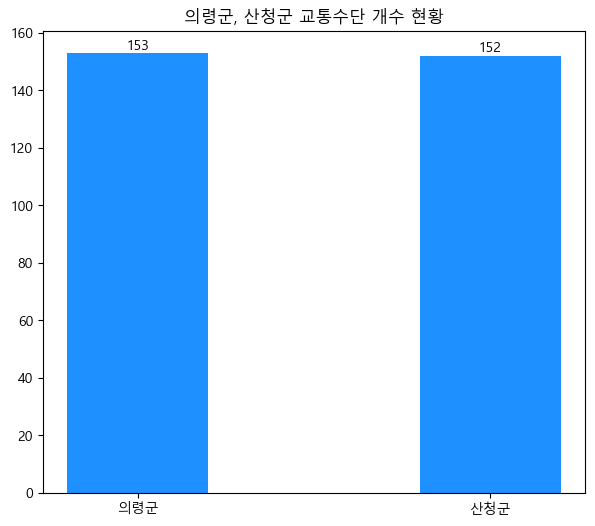

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,6))
plt.rcParams['font.family']= 'Malgun Gothic'

x = ['의령군','산청군']
y = [153, 152]

plt.bar(x,y,color= 'dodgerblue', width = 0.4)

plt.text(0,154,str(153), ha = 'center', fontsize = 10)
plt.text(1, 153.5, str(152), ha = 'center', fontsize = 10)

plt.title('의령군, 산청군 교통수단 개수 현황')
plt.show()

In [63]:
li = 의령23['접근성 변수명'].to_list()

종류 = []
주소 = []

for i in li:
    i_split = i.split('_')
    종류.append(i_split[0])
    주소.append(i_split[1])


의령23['종류'] = 종류
의령23['주소'] = 주소

의령23 = 의령23.drop('접근성 변수명', axis = 1)

의령23

print(의령23['종류'].value_counts())

종류
주차장      96
버스정류장    57
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3704\2722470052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령23['종류'] = 종류
C:\Users\user\AppData\Local\Temp\ipykernel_3704\2722470052.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령23['주소'] = 주소


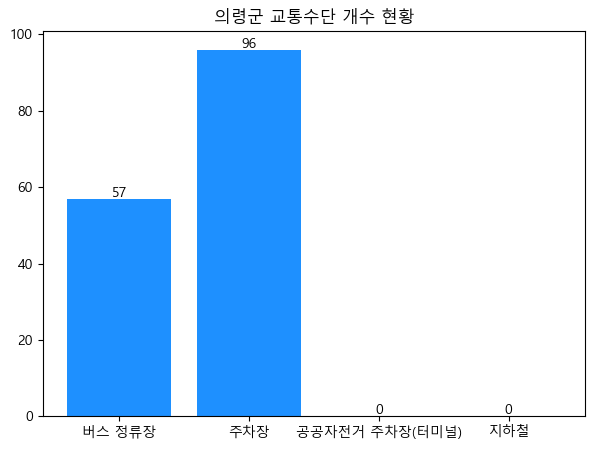

의령군 교통수단 총 개수 : 153


In [77]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [57, 96, 0, 0]

plt.bar(x,y, color = 'dodgerblue')

plt.text(0,57.5,str(57), ha = 'center', fontsize = 10)
plt.text(1, 96.5, str(96), ha = 'center', fontsize = 10)
plt.text(2, 0.5, str(0), ha = 'center', fontsize = 10)
plt.text(3, 0.5, str(0), ha = 'center', fontsize = 10)

plt.title('의령군 교통수단 개수 현황')
plt.show()

print(f'의령군 교통수단 총 개수 : {sum(y)}')

In [74]:
산청23


li = 산청23['접근성 변수명'].to_list()

종류 = []
주소 = []

for i in li:
    i_split = i.split('_')
    종류.append(i_split[0])
    주소.append(i_split[1])


산청23['종류'] = 종류
산청23['주소'] = 주소

산청23 = 산청23.drop('접근성 변수명', axis = 1)

산청23

print(산청23['종류'].value_counts())

종류
버스정류장    130
주차장       22
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3704\1542983545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청23['종류'] = 종류
C:\Users\user\AppData\Local\Temp\ipykernel_3704\1542983545.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청23['주소'] = 주소


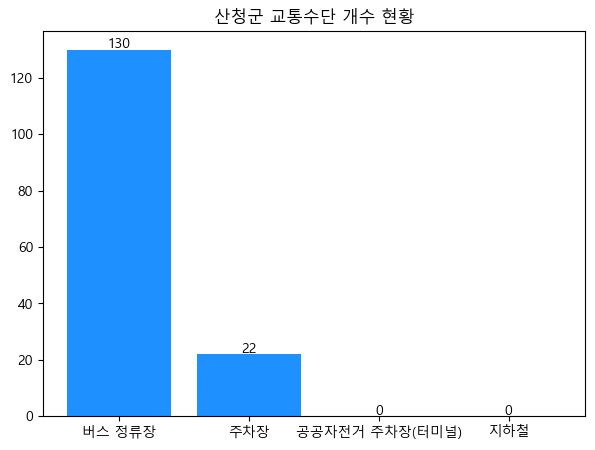

산청군 교통수단 총 개수 : 152


In [78]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [130, 22, 0, 0]

plt.bar(x,y, color = 'dodgerblue')

plt.text(0,130.5,str(130), ha = 'center', fontsize = 10)
plt.text(1, 22.5, str(22), ha = 'center', fontsize = 10)
plt.text(2, 0.5, str(0), ha = 'center', fontsize = 10)
plt.text(3, 0.5, str(0), ha = 'center', fontsize = 10)

plt.title('산청군 교통수단 개수 현황')
plt.show()

print(f'산청군 교통수단 총 개수 : {sum(y)}')